## Steps of K-means algorithm :
Specify the number of clusters (K) to be created (by the analyst)<br> <br>
Select randomly k objects from the dataset as the initial cluster centers or means <br><br>
Assigns each observation to their closest centroid, based on the Euclidean distance between the object and the centroid <br><br>
For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster. The centoid of a Kth cluster is a vector of length p containing the means of all variables for the observations in the kth cluster; p is the number of variables. <br><br>
Iteratively minimize the total within sum of square. That is, iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached. By default, the R software uses 10 as the default value for the maximum number of iterations.

# 1. Targeting treatment for heart disease patients

Loading the data

In [39]:
heart_disease <- read.csv("datasets/heart_disease_patients.csv")

Afficher les 10 premiers lignes de Dataset

In [40]:
head(heart_disease, 10)

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1
7,62,0,4,140,268,0,2,160,0,3.6,3
8,57,0,4,120,354,0,0,163,1,0.6,1
9,63,1,4,130,254,0,2,147,0,1.4,2
10,53,1,4,140,203,1,2,155,1,3.1,3


Vérifier que les valeurs à traiter sont tous numeriques

In [3]:
lapply(heart_disease, is.numeric)

$id
[1] TRUE

$age
[1] TRUE

$sex
[1] TRUE

$cp
[1] TRUE

$trestbps
[1] TRUE

$chol
[1] TRUE

$fbs
[1] TRUE

$restecg
[1] TRUE

$thalach
[1] TRUE

$exang
[1] TRUE

$oldpeak
[1] TRUE

$slope
[1] TRUE

# 2. Quantifying patient differences


To improve the quality of the datasets and the performance of subsequent steps, we need to apply several data preprocessing techniques to clean noisy data, replace missing values, correct inconsistencies in data, and eliminate redundant features. In our dataset, there are two attributes (“chol” and “thalach”) that have missing values, as shown in Fig. 2. There are several methods to handle missing values in the dataset. Since our heart disease dataset has only two attributes with missing values and the number of missing values is small, we used the imputation strategy. There are many ways to impute missing values. Since these two attributes only contain numeric values, we impute the mean value for each attribute.

La quantification présente plusieurs avantages que l'on peut classer en fonction de leur nature. Elle présente des intérêts méthodologiques, augmente la crédibilité et constitue actuellement une opportunité.

Le principal avantage de la quantification est la commensuration. En effet, une mesure commune crée des relations spécifiques entre les objets, laquelle permet de les représenter plus facilement et surtout de les comparer relativement à l'aspect mesuré. Par exemple, 20 kilos et 40 kilos sont plus précis et plus facile à comprendre et comparer qu'une expression verbale qui pourrait y être associée telle que lourd et très lourd.

Un second avantage de la quantification réside dans la facilité d'analyse des nombres comparés aux données qualitatives, ce qui ouvre une large variété d'analyses réalisables rapidement.

Un troisième avantage est la transparence des analyses qui sont explicites et peuvent donc être vérifiées et répliquées.Cette transparence confère une fiabilité aux analyses valorisée dans de nombreuses perspectives de recherche

In [41]:
# evidence that the data should be scaled?
# We use summary to show : Min,1st Quantile,Median,Mean,3rd Quantile,Max, value of our input data
summary(heart_disease) 


       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

In [10]:
# remove id because we need to qunatify qualitative attributs or id is a qunatitative value(nominal) and it will not be including for the clustering data 
heart_disease <- heart_disease[ , !(names(heart_disease) %in% c("id"))]

Scaling est un processus pour comparer les données qui ne sont pas mesurées dans la même approche. c'est la normalisation d'un ensemble de données à l'aide de la valeur moyenne et de l'écart type. Scaling est souvent utilisée avec des vecteurs ou des colonnes d'un bloc de données .Cette etape est importante dans les algorithmes tels que les machines à vecteurs de support (SVM) et les k-plus proches voisins (KNN) où la distance entre les points de données est importante.

In [42]:
# scaling data and saving as a data frame : la fonction scale() soustrait les valeurs de chaque colonne par la valeur "centre" correspondante de l'argument uniquement si la valeur fournie est numérique.
scaled <- scale(heart_disease)

In [43]:
# what does data look like now?
summary(scaled)

       id               age               sex                cp         
 Min.   :-1.7235   Min.   :-2.8145   Min.   :-1.4549   Min.   :-2.2481  
 1st Qu.:-0.8617   1st Qu.:-0.7124   1st Qu.:-1.4549   1st Qu.:-0.1650  
 Median : 0.0000   Median : 0.1727   Median : 0.6851   Median :-0.1650  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8617   3rd Qu.: 0.7259   3rd Qu.: 0.6851   3rd Qu.: 0.8765  
 Max.   : 1.7235   Max.   : 2.4961   Max.   : 0.6851   Max.   : 0.8765  
    trestbps             chol              fbs             restecg         
 Min.   :-2.14149   Min.   :-2.3310   Min.   :-0.4169   Min.   :-0.995103  
 1st Qu.:-0.66420   1st Qu.:-0.6894   1st Qu.:-0.4169   1st Qu.:-0.995103  
 Median :-0.09601   Median :-0.1100   Median :-0.4169   Median : 0.009951  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000  
 3rd Qu.: 0.47218   3rd Qu.: 0.5467   3rd Qu.:-0.4169   3rd Qu.: 1.015005  
 Max.   : 3.88132   Max.   : 6.12

# 3. Let's start grouping patients

Une fois que nous avons préparé nos données, nous pouvons maintenant démarrer le processus de clustering. Pour l'algorithme des k-means, il est nécessaire de sélectionner à l'avance le nombre de clusters.

Il est également important de s'assurer que nos résultats sont reproductibles lors de la réalisation d'une analyse statistique. Cela signifie que lorsque quelqu'un exécute notre code sur les mêmes données, il obtiendra les mêmes résultats que ceux que vous avez signalés. 

La reproductibilité est particulièrement importante car les médecins utiliseront potentiellement nos résultats pour traiter les patients. Il est vital qu'un autre analyste puisse voir d'où viennent les groupes et être en mesure de vérifier les résultats.

In [44]:
#Comme l'algorithme de clustering k-means commence par k centroïdes sélectionnés au hasard,
#il est toujours recommandé d'utiliser la fonction set.seed() afin de définir une graine pour
#le générateur de nombres aléatoires de R. Le but est de rendre reproductibles les résultats, 
#afin que le lecteur de cet article obtienne exactement les mêmes résultats que ceux nous avons travaillé sur.

seed_val <- 10  
set.seed(seed_val)

# selectionner le nombre des clusters
k <- 5

# Exécuter le K-means algorithme: Ce dernière prend trois arguments principaux : la matrice de données, le nombre de clusters, et le nombre d’itérations de l'algorithme
premier_clust <- kmeans(scaled, centers = k, nstart = 1)


In [45]:
#Afficher le resultat d'algorithme K-means
print(premier_clust)

K-means clustering with 5 clusters of sizes 47, 65, 102, 48, 41

Cluster means:
           id        age        sex          cp   trestbps        chol
1 -0.59157790  0.4128121  0.4118830  0.36685039  0.3053487 -0.06392985
2  0.04003631  0.6833357 -0.9610526 -0.03680656  0.2842392  0.70626972
3  0.04364123 -0.8219291  0.2654695 -0.46111630 -0.4096296 -0.37049841
4  0.45869447  0.1565744  0.1946620  0.76804273 -0.1421764 -0.08098337
5 -0.03090094  0.3049321  0.1631281 -0.11418855  0.3848717 -0.02987292
         fbs    restecg     thalach       exang     oldpeak       slope
1 -0.2974798  0.5873225 -0.64600968  0.52732723  1.52534014  1.06236824
2 -0.3737536  0.3501232  0.11267123 -0.49899477 -0.34151715 -0.37555904
3 -0.3894210 -0.3841878  0.63090504 -0.50766324 -0.48247717 -0.46563194
4 -0.4169448 -0.3460056 -0.84075445  1.21138222  0.04842872  0.37757773
5  2.3904835  0.1325186 -0.02334819  0.03135572 -0.06351898  0.09392091

Clustering vector:
  [1] 5 1 1 1 3 3 1 2 1 1 3 2 5 3 5 3 3 3 

In [46]:
# Clustering K-means montrant combien de patient dans chaque groupe
premier_clust$size

[1]  47  65 102  48  41

In [47]:
# Cluster means 
premier_clust$centers

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
-0.59157790,0.4128121,0.4118830,0.36685039,0.3053487,-0.06392985,-0.2974798,0.5873225,-0.64600968,0.52732723,1.52534014,1.06236824
0.04003631,0.6833357,-0.9610526,-0.03680656,0.2842392,0.70626972,-0.3737536,0.3501232,0.11267123,-0.49899477,-0.34151715,-0.37555904
0.04364123,-0.8219291,0.2654695,-0.46111630,-0.4096296,-0.37049841,-0.3894210,-0.3841878,0.63090504,-0.50766324,-0.48247717,-0.46563194
0.45869447,0.1565744,0.1946620,0.76804273,-0.1421764,-0.08098337,-0.4169448,-0.3460056,-0.84075445,1.21138222,0.04842872,0.37757773
-0.03090094,0.3049321,0.1631281,-0.11418855,0.3848717,-0.02987292,2.3904835,0.1325186,-0.02334819,0.03135572,-0.06351898,0.09392091


# 4. Another round of k-means

Étant donné que l'algorithme k-means sélectionne initialement les centres de cluster en sélectionnant des points de manière aléatoire, différentes itérations de l'algorithme peuvent entraîner la création de différents clusters. <br>

En ce qui concerne les données sur les maladies cardiaques, cela signifierait que les mêmes patients seraient regroupés même lorsque l'algorithme est initialisé à différents points aléatoires.<br>

Nous allons explorer comment les patients sont regroupés avec une autre itération de l'algorithme k-means. Nous pourrons alors comparer les groupes de patients résultants.

In [48]:
# set the seed
seed_val <- 28
set.seed(seed_val)

# run the k-means algorithms
k <- 5
deuxieme_clust = kmeans(scaled, centers = k, nstart = 1)

# how many patients are in each group
deuxieme_clust$size

[1] 63 93 30 57 60

In [49]:
# Cluster means 
deuxieme_clust$centers

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
-0.03858971,0.5959347,-1.3190188,-0.06580154,0.01221568,0.57184783,-0.1495707,0.105670471,0.03521039,-0.5603314,-0.3430735,-0.3822959
0.14899382,-0.8539442,0.3169043,-0.29938593,-0.41004285,-0.32987993,-0.2358204,-0.454751414,0.69593962,-0.4208232,-0.6138468,-0.7478993
0.04755775,0.1837723,-0.3135780,0.66822940,0.93809475,0.32395898,1.4546741,0.445474485,-0.37481644,1.1492983,0.3965257,0.7021339
-0.40208824,0.3551608,0.5724398,-0.60353402,0.39043938,-0.21905885,0.2233459,0.380234129,0.19510007,-0.6207927,0.4116357,0.6195714
0.16778373,0.2685931,0.5067393,0.77238244,-0.21722484,-0.04299991,-0.4169448,0.009951031,-1.11361415,1.2557279,0.7223731,0.6209949


In [101]:
seed_val <- 123 
set.seed(seed_val)

# selectionner le nombre des clusters
k <- 6

# Exécuter le K-means algorithme: Ce dernière prend trois arguments principaux : la matrice de données, le nombre de clusters, et le nombre d’itérations de l'algorithme
troisieme_clust <- kmeans(scaled, centers = k, nstart = 25)
troisieme_clust$size

[1] 52 42 60 50 44 55

# 5. Comparing patient clusters

Il est important que les clusters résultant de l'algorithme des k-moyennes soient stables. Même si l'algorithme commence par initialiser de manière aléatoire les centres de cluster, si l'algorithme k-means est le bon choix pour les données, alors différentes initialisations de l'algorithme donneront des clusters similaires.

Les clusters de différentes itérations peuvent ne pas être exactement les mêmes, mais les clusters doivent avoir à peu près la même taille et avoir des distributions de variables similaires. 

Nous allons utiliser quelques visualisations pour avoir une idée des stabilités du cluster. De cette façon, nous pouvons voir comment certaines caractéristiques des patients ont pu être utilisées pour regrouper les patients.

In [36]:
install.packages ("rlang")


  There is a binary version available but the source version is later:
      binary source needs_compilation
rlang 0.4.11 0.4.12              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll vers C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"



The downloaded binary packages are in
	C:\Users\yosr_abdelhamid\AppData\Local\Temp\RtmpINJNgg\downloaded_packages


In [37]:
install.packages("ggplot2", dependencies = TRUE)

also installing the dependencies 'proxy', 'png', 'jpeg', 'checkmate', 'Rcpp', 'matrixStats', 'RcppArmadillo', 'e1071', 'wk', 'pkgload', 'waldo', 'systemfonts', 'textshaping', 'survival', 'Formula', 'latticeExtra', 'gridExtra', 'htmlTable', 'viridis', 'deldir', 'RcppEigen', 'sp', 'mvtnorm', 'TH.data', 'sandwich', 'SparseM', 'MatrixModels', 'conquer', 'classInt', 's2', 'units', 'lifecycle', 'testthat', 'rlang', 'ragg', 'ggplot2movies', 'Hmisc', 'interp', 'mapproj', 'maptools', 'multcomp', 'profvis', 'quantreg', 'rgeos', 'sf', 'svglite', 'vdiffr'





  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
proxy             0.4-25     0.4-26              TRUE
jpeg             0.1-8.1      0.1-9              TRUE
Rcpp               1.0.6      1.0.7              TRUE
matrixStats       0.58.0     0.61.0              TRUE
RcppArmadillo 0.10.4.0.0 0.10.7.3.0              TRUE
e1071              1.7-6      1.7-9              TRUE
wk                 0.4.1      0.5.0              TRUE
pkgload            1.2.1      1.2.4             FALSE
waldo              0.2.5      0.3.1             FALSE
systemfonts        1.0.2      1.0.3              TRUE
textshaping        0.3.4      0.3.6              TRUE
survival          3.2-11     3.2-13              TRUE
htmlTable          2.1.0      2.3.0             FALSE
viridis            0.6.1      0.6.2             FALSE
deldir            0.2-10      1.0-6              TRUE
sp                 1.4-5      1.4-6              TRUE
mvtnorm 

Warning message:
"cannot remove prior installation of package 'Rcpp'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll vers C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"
Warning message:
"restored 'Rcpp'"


package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'wk' successfully unpacked and MD5 sums checked
package 'systemfonts' successfully unpacked and MD5 sums checked
package 'textshaping' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'deldir' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
pack

Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll vers C:\Users\yosr_abdelhamid\anaconda3\envs\r-project\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'ragg' successfully unpacked and MD5 sums checked
package 'ggplot2movies' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'interp' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'profvis' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'rgeos' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'svglite' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yosr_abdelhamid\AppData\Local\Temp\RtmpINJNgg\downloaded_packages


installing the source packages 'pkgload', 'waldo', 'htmlTable', 'viridis', 'TH.data', 'sandwich', 'lifecycle', 'ggplot2'


Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'pkgload' had non-zero exit status"
Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'waldo' had non-zero exit status"
Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'lifecycle' had non-zero exit status"
Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'ggplot2' had non-zero exit status"
Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'viridis' had non-zero exit status"


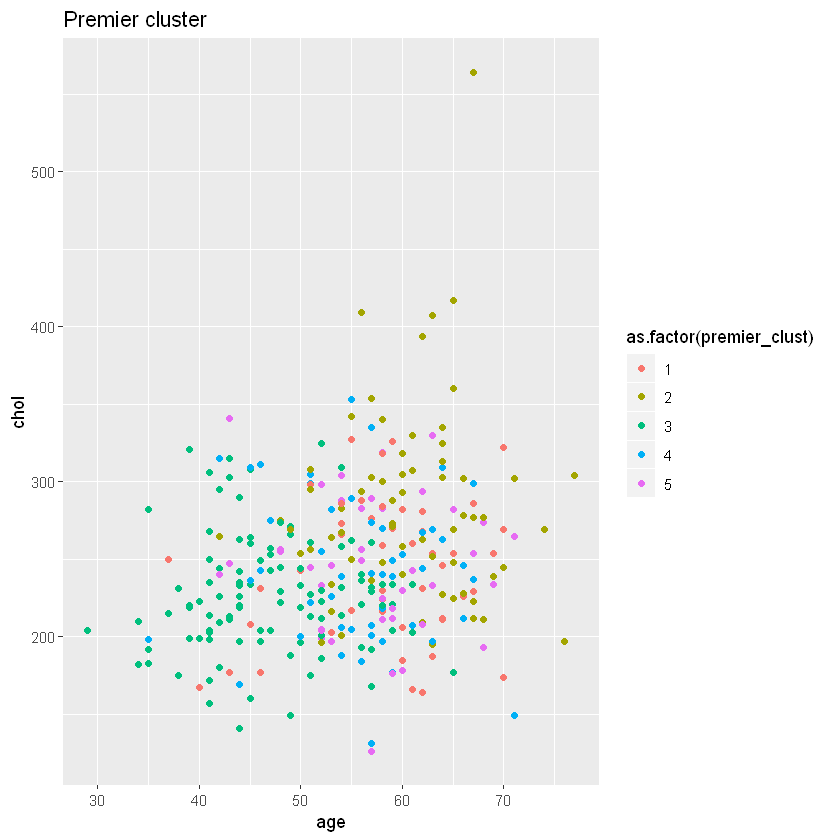

In [76]:
heart_disease['premier_clust'] = premier_clust$cluster

# load ggplot2 : C'est une librairie R de visualisation de données
library(ggplot2)

#Creation d'affichage d'attribut age et chol de premier algorithme de clustering
plot_one <-
  ggplot(heart_disease, aes(x = age,y = chol,color = as.factor(premier_clust))) +
  geom_point()+ #Le geom_point() est utilisé pour créer des nuages de points qui est très utile pour afficher la relation entre deux variables continues
  ggtitle("Premier cluster")

plot_one



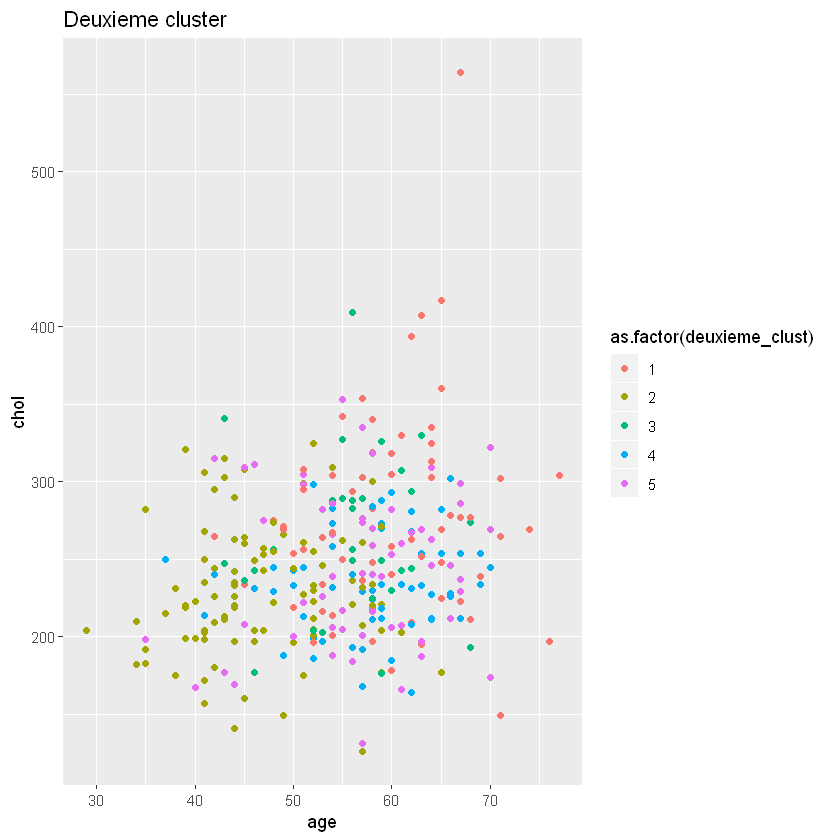

In [75]:
heart_disease['deuxieme_clust'] = deuxieme_clust$cluster

# load ggplot2 : C'est une librairie R de visualisation de données
library(ggplot2)
#Creation d'affichage d'attribut age et chol de deuxieme algorithme de clustering
plot_two <-
  ggplot(heart_disease, aes(x = age,y = chol,color = as.factor(deuxieme_clust))) +
  geom_point()+
  ggtitle("Deuxieme cluster")

plot_two

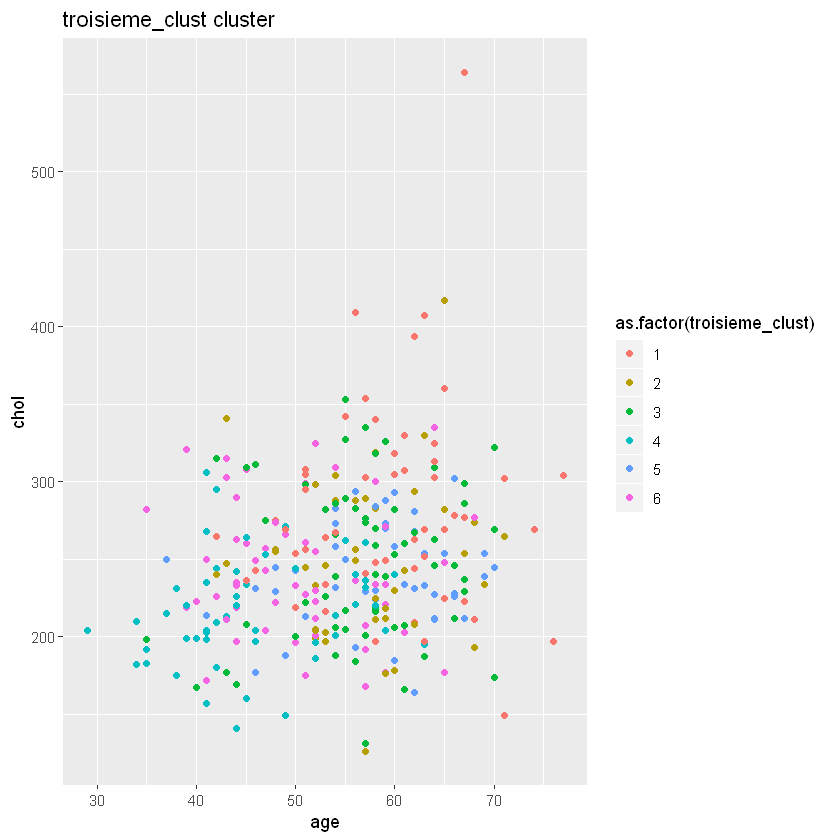

In [102]:
heart_disease['troisieme_clust'] = troisieme_clust$cluster

# load ggplot2 : C'est une librairie R de visualisation de données
library(ggplot2)
#Creation d'affichage d'attribut age et chol de deuxieme algorithme de clustering
plot_three <-
  ggplot(heart_disease, aes(x = age,y = chol,color = as.factor(troisieme_clust))) +
  geom_point()+
  ggtitle("troisieme_clust cluster")

plot_three

# 6. Hierarchical clustering: another clustering approach

Hierarchical clustering, également connu sous le nom hierarchical cluster analysis, est un algorithme qui regroupe des objets similaires en groupes appelés clusters . Le point de terminaison est un ensemble de clusters , où chaque cluster est distinct des autres clusters, et les objets au sein de chaque cluster sont largement similaires les uns aux autres.

Le clustering hiérarchique commence par traiter chaque observation comme un cluster distinct. Ensuite, il exécute à plusieurs reprises les deux étapes suivantes : (1) identifier les deux clusters les plus proches et (2) fusionner les deux clusters les plus similaires. Ce processus itératif se poursuit jusqu'à ce que tous les clusters soient fusionnés.

La sortie principale du clustering hiérarchique est un dendrogramme , qui montre la relation hiérarchique entre les clusters:Il  permet de voir à quel point les observations sont similaires les unes aux autres et sont utiles pour sélectionner le nombre de grappes pour regrouper les données.

Il existe plusieurs façons de mesurer la distance entre les clusters afin de décider des règles de clustering, et elles sont souvent appelées méthodes de liaison. Certaines des méthodes de liaison courantes sont :

* Liaison complète : calcule la distance maximale entre les clusters avant la fusion.

* Liaison unique : calcule la distance minimale entre les clusters avant la fusion. Ce lien peut être utilisé pour détecter des valeurs élevées dans votre ensemble de données qui peuvent être des valeurs aberrantes car elles seront fusionnées à la fin.

* Lien moyen : calcule la distance moyenne entre les clusters avant la fusion.

* Lien de centroïde : recherche le centroïde du cluster 1 et le centroïde du cluster 2, puis calcule la distance entre les deux avant de fusionner.


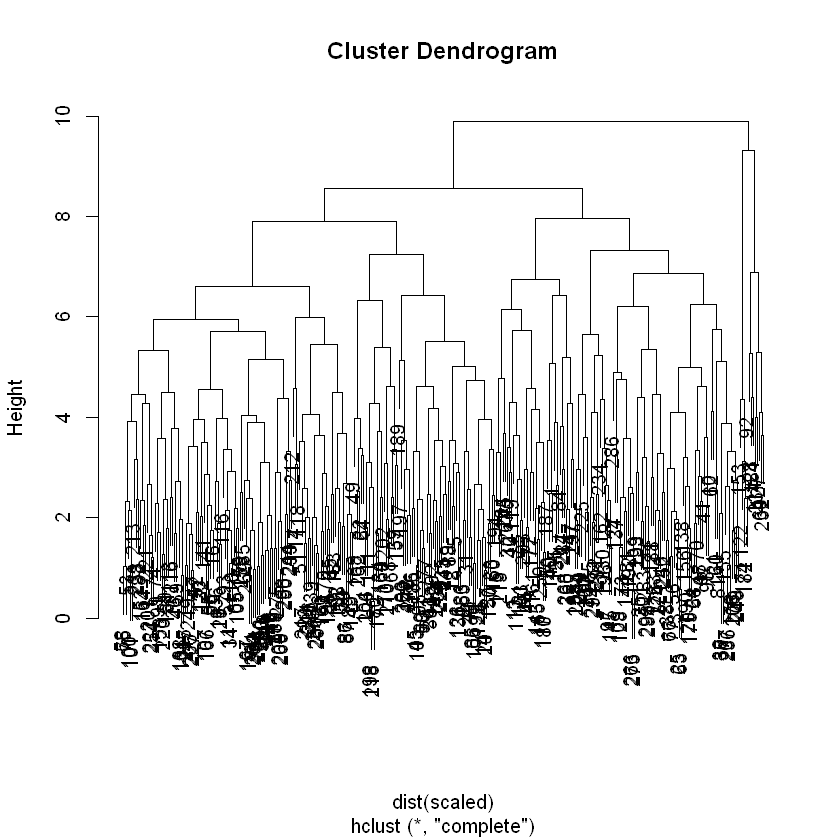

In [77]:
# executing hierarchical clustering with complete linkage
hier_clust_1 <- hclust(dist(scaled), method = "complete")

# printing the dendrogram
plot(hier_clust_1)

# getting cluster assignments based on number of selected clusters
hc_1_assign <- cutree(hier_clust_1, 5)

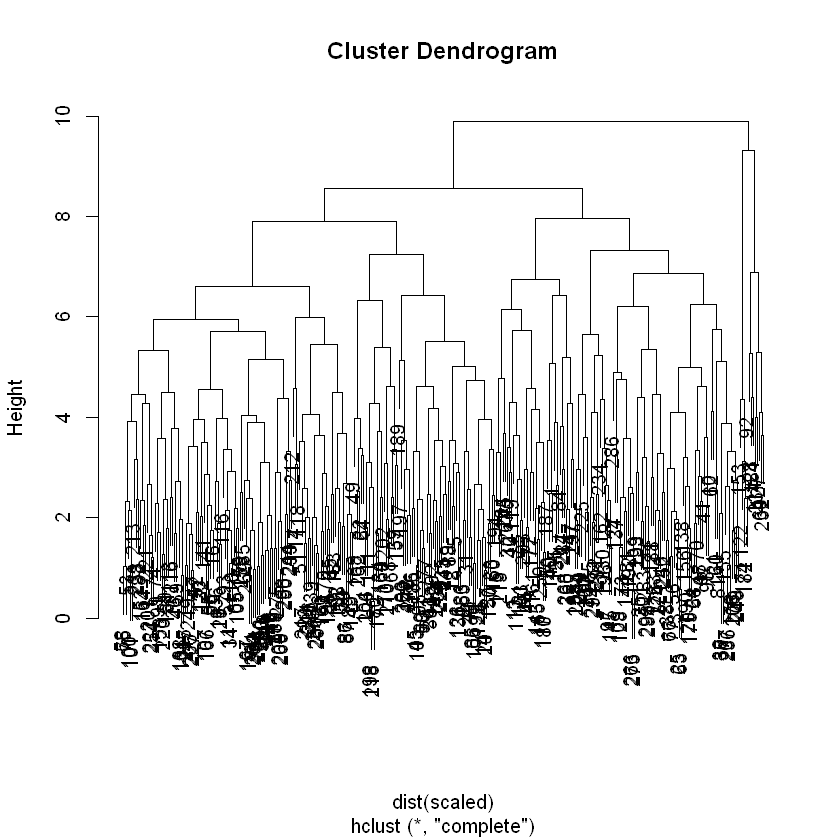

In [93]:
# executing hierarchical clustering with complete linkage
hier_clust_11 <- hclust(dist(scaled), method = "complete")

# printing the dendrogram
plot(hier_clust_11)

# getting cluster assignments based on number of selected clusters
hc_11_assign <- cutree(hier_clust_11, 4)

# 7. Hierarchical clustering round two


Nous voulons explorer différents algorithmes pour regrouper nos patients cardiaques. La meilleure façon de mesurer la dissemblance entre les patients pourrait être d'examiner la plus petite différence entre les patients et de minimiser cette différence lors du regroupement des grappes. C'est toujours une bonne idée d'explorer différentes mesures de dissemblance. Implémentons le clustering hiérarchique à l'aide d'une nouvelle fonction de liaison.

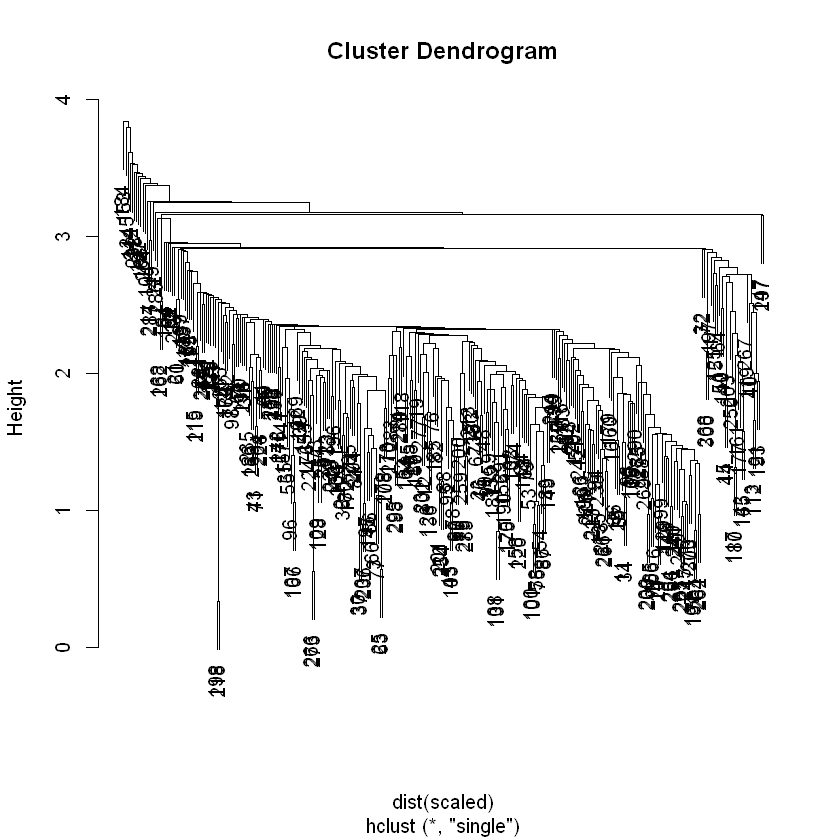

In [78]:
# executing hierarchical clustering with complete linkage
hier_clust_2 <- hclust(dist(scaled), method = "single")

# printing the dendrogram
plot(hier_clust_2)

# getting cluster assignments based on number of selected clusters
hc_2_assign <- cutree(hier_clust_2, 5)

# 8. Comparing clustering results

Les médecins sont intéressés à regrouper des patients similaires afin de déterminer les traitements appropriés. Par conséquent, ils veulent avoir des groupes avec plus de quelques patients pour voir différentes options de traitement. Bien qu'il soit possible qu'un patient soit seul dans un groupe, cela signifie que le traitement qu'il a reçu pourrait ne pas être recommandé pour quelqu'un d'autre dans le groupe.

Nous allons examiner les clusters résultant des deux algorithmes hiérarchiques pour les evaluer 

In [91]:
# adding assignments of chosen hierarchical linkage
heart_disease$hc_clust <- hc_1_assign

# remove 'sex', 'first_clust', and 'second_clust' variables
hd_simple <-
  heart_disease[,!(names(heart_disease) %in% c("sex", "premier_clust", "deuxieme_clust"))]

# getting mean and standard deviation summary statistics
clust_summary <-
  do.call(data.frame,
  aggregate(. ~ hc_clust, data = hd_simple, function(x)
  c(avg = mean(x), sd = sd(x))))
clust_summary

hc_clust,id.avg,id.sd,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,...,slope.avg,slope.sd,first_clust.avg,first_clust.sd,second_clust.avg,second_clust.sd,troisieme_clust.avg,troisieme_clust.sd,hcc_clust.avg,hcc_clust.sd
1,159.1739,90.63918,58.47826,8.027746,3.521739,0.787488,132.1478,16.97844,236.2957,...,1.869565,0.5544357,3.147826,1.6661937,3.834783,1.3760510,1.800000,1.052982,1.034783,0.3730019
2,147.9375,87.10907,51.51136,8.711889,2.903409,0.972061,129.9205,16.50401,247.5852,...,1.363636,0.5276756,2.806818,0.7687906,2.232955,1.1400473,3.136364,0.773590,1.000000,0.0000000
3,135.3750,75.94347,57.00000,6.718843,3.250000,1.388730,162.5000,24.37212,278.1250,...,2.750000,0.4629100,2.000000,1.8516402,3.375000,0.5175492,1.250000,0.462910,1.500000,1.0690450
4,157.7500,26.78775,62.00000,4.546061,3.750000,0.500000,134.7500,14.72809,443.5000,...,2.000000,0.0000000,2.000000,0.0000000,1.500000,1.0000000,4.000000,0.000000,1.500000,1.0000000


In [94]:
heart_disease$hcc_clust <- hc_11_assign

# remove 'sex', 'first_clust', and 'second_clust' variables
hd_simple <-
  heart_disease[,!(names(heart_disease) %in% c("sex", "premier_clust", "deuxieme_clust"))]

# getting mean and standard deviation summary statistics
clust_summary <-
  do.call(data.frame,
  aggregate(. ~ hcc_clust, data = hd_simple, function(x)
  c(avg = mean(x), sd = sd(x))))
clust_summary

hcc_clust,id.avg,id.sd,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,...,slope.avg,slope.sd,first_clust.avg,first_clust.sd,second_clust.avg,second_clust.sd,hc_clust.avg,hc_clust.sd,troisieme_clust.avg,troisieme_clust.sd
1,159.1739,90.63918,58.47826,8.027746,3.521739,0.787488,132.1478,16.97844,236.2957,...,1.869565,0.5544357,3.147826,1.6661937,3.834783,1.3760510,1,0,1.800000,1.052982
2,147.9375,87.10907,51.51136,8.711889,2.903409,0.972061,129.9205,16.50401,247.5852,...,1.363636,0.5276756,2.806818,0.7687906,2.232955,1.1400473,2,0,3.136364,0.773590
3,135.3750,75.94347,57.00000,6.718843,3.250000,1.388730,162.5000,24.37212,278.1250,...,2.750000,0.4629100,2.000000,1.8516402,3.375000,0.5175492,3,0,1.250000,0.462910
4,157.7500,26.78775,62.00000,4.546061,3.750000,0.500000,134.7500,14.72809,443.5000,...,2.000000,0.0000000,2.000000,0.0000000,1.500000,1.0000000,4,0,4.000000,0.000000


# 9. Visualizing the cluster contents

En plus d'examiner les distributions des variables dans chacune des exécutions de clustering hiérarchique, nous effectuerons des visualisations pour évaluer les algorithmes.Ceci va nous permettre d'avoir une idée de la façon dont les données se regroupent en examinant un nuage de points de deux variables.

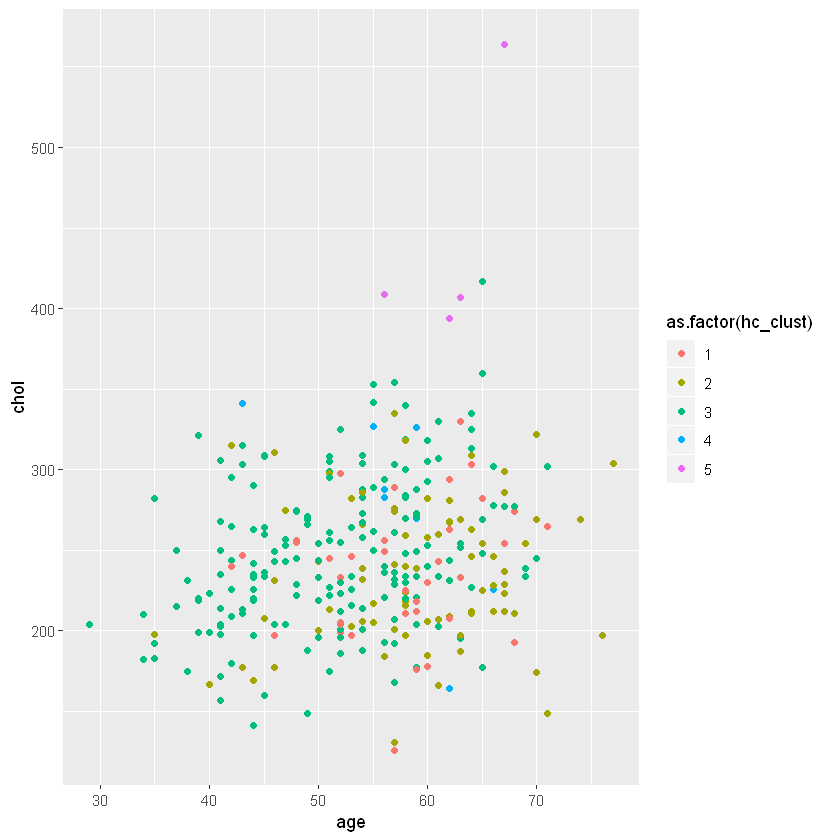

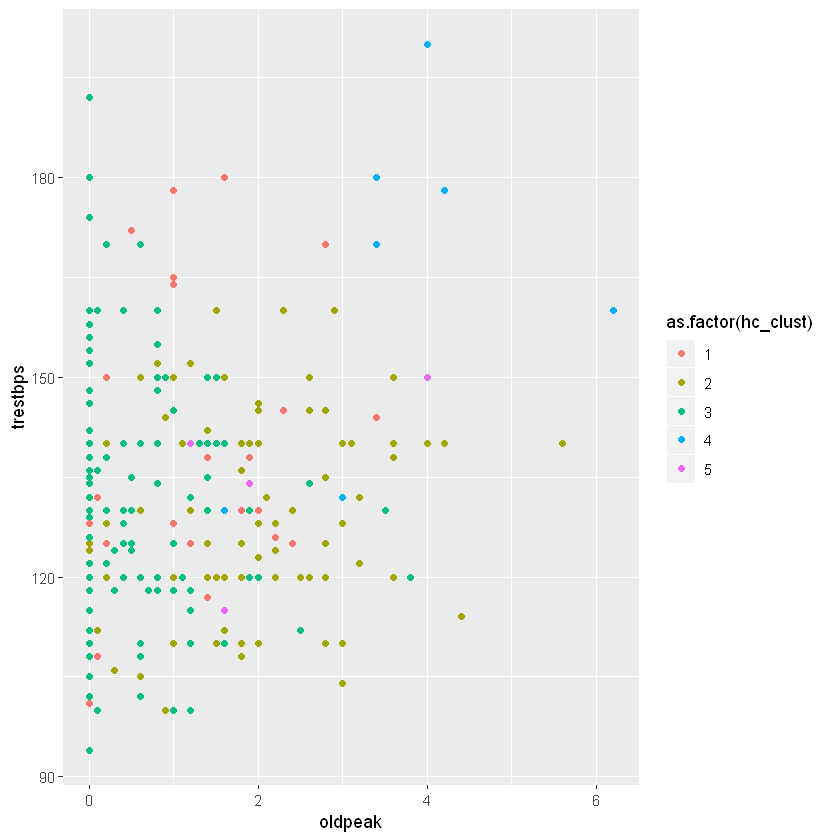

In [81]:
# plotting age and chol
plot_one <-
  ggplot(heart_disease, aes(
  x = age,
  y = chol,
  color = as.factor(hc_clust)
  )) +
  geom_point()

plot_one 

# plotting oldpeak and trestbps
plot_two <-
  ggplot(heart_disease, aes(
  x = oldpeak,
  y = trestbps,
  color = as.factor(hc_clust)
  )) +
  geom_point()

plot_two

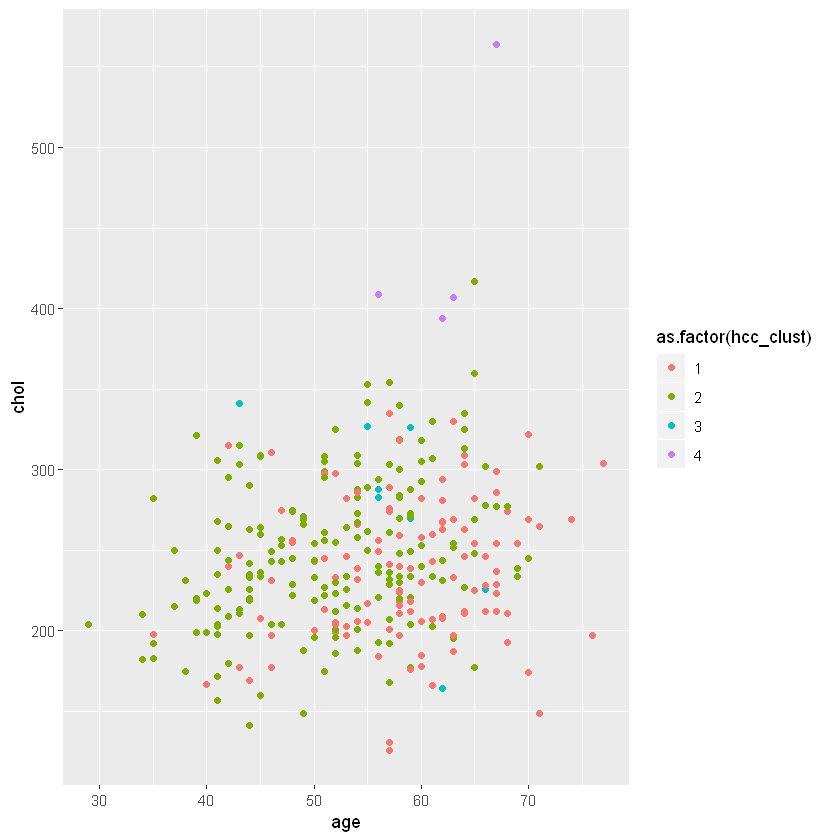

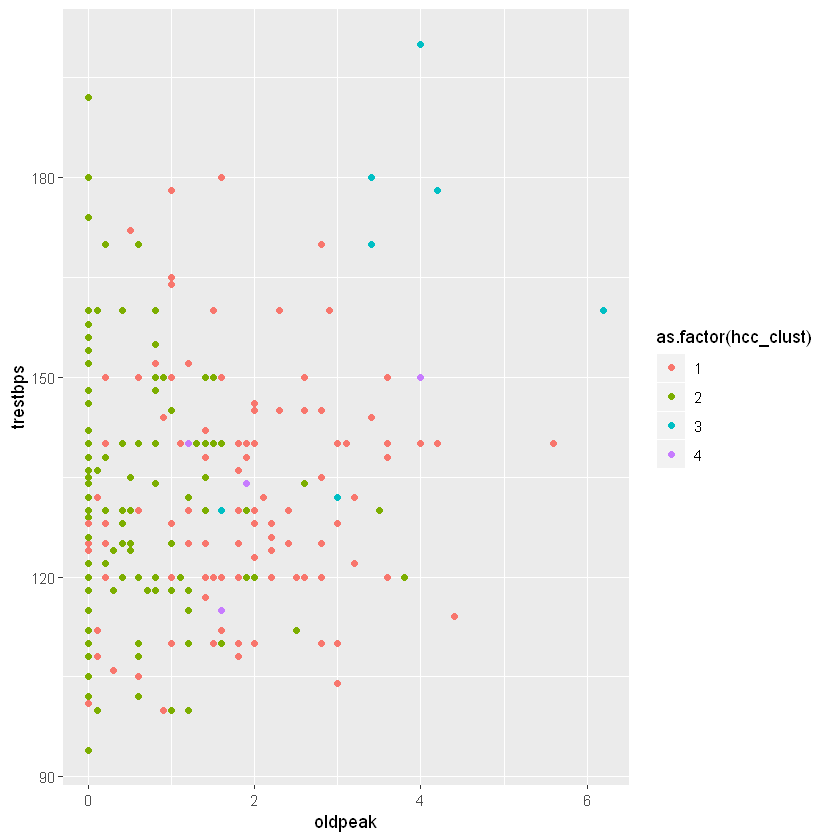

In [95]:
plot_one <-
  ggplot(heart_disease, aes(
  x = age,
  y = chol,
  color = as.factor(hcc_clust)
  )) +
  geom_point()

plot_one 

# plotting oldpeak and trestbps
plot_two <-
  ggplot(heart_disease, aes(
  x = oldpeak,
  y = trestbps,
  color = as.factor(hcc_clust)
  )) +
  geom_point()

plot_two

# 10. Conclusion

Pour l'algorithme k-means, il est impératif que des clusters similaires soient produits pour chaque itération de l'algorithme. Nous voulons nous assurer que l'algorithme regroupe le signal par opposition au bruit.

Pour le bien des médecins, nous souhaitons également avoir plusieurs patients dans chaque groupe afin qu'ils puissent comparer les traitements. Nous n'avons fait que quelques travaux préliminaires pour explorer les performances des algorithmes. Il est nécessaire de créer plus de visualisations et d'explorer comment les algorithmes regroupent d'autres variables.

=> Donc on doit explorer Hierarchical clustering_complete
